In [20]:
import pandas as pd

In [21]:
breast_cancer = pd.read_csv("datas/cancer/wisc_bc_data.csv")
print(breast_cancer.shape)
breast_cancer.head(10)

(569, 32)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [22]:
breast_cancer = breast_cancer.drop(columns='id')
print(breast_cancer.diagnosis.value_counts())
print(breast_cancer.diagnosis.value_counts()/len(breast_cancer))

diagnosis
B    357
M    212
Name: count, dtype: int64
diagnosis
B    0.627417
M    0.372583
Name: count, dtype: float64


In [23]:
dignosis_dict = {"B":0,"M":1}
breast_cancer["diagnosis"] = breast_cancer["diagnosis"].map(dignosis_dict)

In [24]:
def min_max_normalize(x):
    return (x - x.min())/(x.max() - x.min())
for col in breast_cancer.columns[1:31]:
    breast_cancer[col] = min_max_normalize(breast_cancer[col])
breast_cancer.iloc[:,1:].describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.338222,0.323965,0.332935,0.216920,0.394785,0.260601,0.208058,0.243137,0.379605,0.270379,...,0.296663,0.363998,0.283138,0.170906,0.404138,0.220212,0.217403,0.393836,0.263307,0.189596
std,0.166787,0.145453,0.167915,0.149274,0.126967,0.161992,0.186785,0.192857,0.138456,0.148702,...,0.171940,0.163813,0.167352,0.139932,0.150779,0.152649,0.166633,0.225884,0.121954,0.118466
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.223342,0.218465,0.216847,0.117413,0.304595,0.139685,0.069260,0.100944,0.282323,0.163016,...,0.180719,0.241471,0.167837,0.081130,0.300007,0.116337,0.091454,0.223127,0.185098,0.107700
50%,0.302381,0.308759,0.293345,0.172895,0.390358,0.224679,0.144189,0.166501,0.369697,0.243892,...,0.250445,0.356876,0.235320,0.123206,0.397081,0.179110,0.181070,0.343402,0.247782,0.163977
75%,0.416442,0.408860,0.416765,0.271135,0.475490,0.340531,0.306232,0.367793,0.453030,0.340354,...,0.386339,0.471748,0.373475,0.220901,0.494156,0.302520,0.305831,0.554639,0.318155,0.242949
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
from sklearn import model_selection
breast_cancer.to_csv("./datas/cancer/okDatas.csv", index = False)
y = breast_cancer['diagnosis']
breast_cancer = breast_cancer.drop(columns='diagnosis')
X = breast_cancer
breast_cancer_minmax_train, breast_cancer_minmax_test,\
breast_cancer_train_labels, breast_cancer_test_labels \
= model_selection.train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
print(breast_cancer_train_labels.value_counts()/len(breast_cancer_train_labels))
print(breast_cancer_test_labels.value_counts()/len(breast_cancer_test_labels))

diagnosis
0    0.625628
1    0.374372
Name: count, dtype: float64
diagnosis
0    0.631579
1    0.368421
Name: count, dtype: float64


#### 以下为朴素贝叶斯

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       108
           1       0.92      0.90      0.91        63

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171

[[103   5]
 [  6  57]]
0.935672514619883


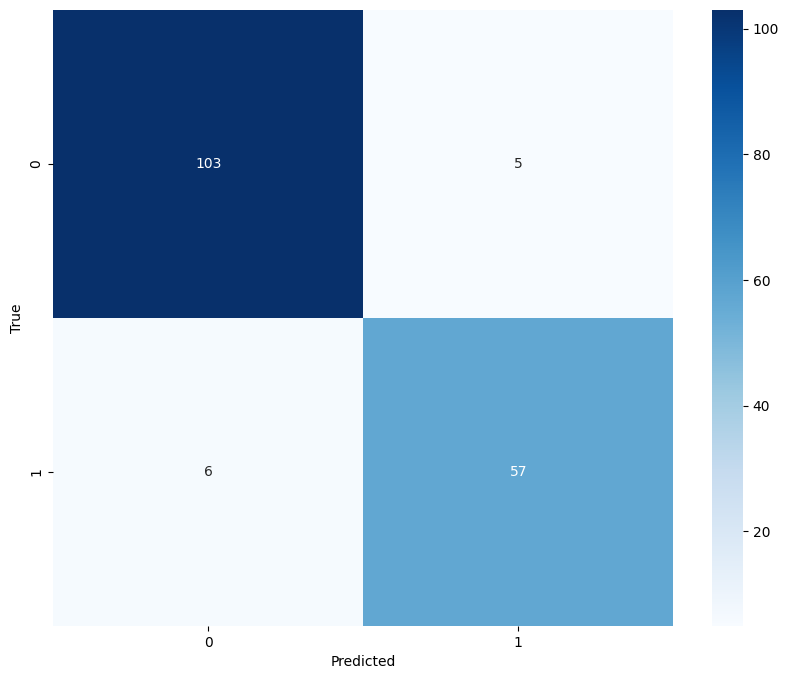

In [27]:
from models import navieBayes # 调用自己复现的贝叶斯分类器
naviBys = navieBayes.navieBayes() # 调用模型
naviBys.fit(breast_cancer_minmax_train, breast_cancer_train_labels)
breast_cancer_test_pred = naviBys.predict(breast_cancer_minmax_test)
from sklearn import metrics
print(metrics.classification_report(breast_cancer_test_labels, breast_cancer_test_pred))
print(metrics.confusion_matrix(breast_cancer_test_labels, breast_cancer_test_pred))
print(metrics.accuracy_score(breast_cancer_test_labels, breast_cancer_test_pred))
from models import drawCM
drawCM.ConfusionMatrixPlotter(metrics.confusion_matrix(breast_cancer_test_labels, breast_cancer_test_pred)).plot()

#### 以下为常规SVM

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       108
           1       1.00      0.97      0.98        63

    accuracy                           0.99       171
   macro avg       0.99      0.98      0.99       171
weighted avg       0.99      0.99      0.99       171

[[108   0]
 [  2  61]]
0.9883040935672515


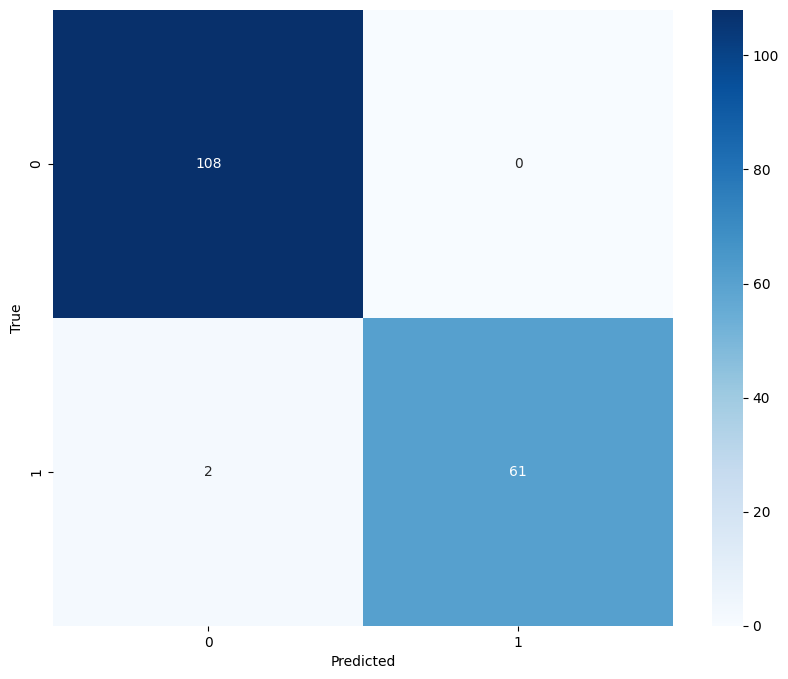

In [28]:
from sklearn import svm
data = pd.read_csv("./datas/cancer/okDatas.csv")
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=42)
svc = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
breast_cancer_test_pred_svm = svc.predict(X_test)
print(metrics.classification_report(y_test, breast_cancer_test_pred_svm))
print(metrics.confusion_matrix(y_test, breast_cancer_test_pred_svm))
print(metrics.accuracy_score(y_test, breast_cancer_test_pred_svm))
from models import drawCM
drawCM.ConfusionMatrixPlotter(metrics.confusion_matrix(y_test, breast_cancer_test_pred_svm)).plot()